In [1]:
import pandas as pd
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [2]:
df6 = pd.read_csv ("data/export_04_10_march.csv")
df1 = pd.read_csv ("data/export_10_15_march.csv")
df2 = pd.read_csv ("data/export_15_20_march.csv")
df3 = pd.read_csv ("data/export_20_25_march.csv")
df4 = pd.read_csv ("data/export_25_30_march.csv")
df5 = pd.read_csv ("data/export_30_06_april.csv")

In [3]:
df = pd.concat([df6, df1, df2, df3, df4, df5], axis=0, sort=False)
df.columns = df.columns.str.replace("[()]", "_")
df['SDATE'] = pd.to_datetime(df.SDATE,dayfirst=True)
df['just_date'] = df['SDATE'].dt.date
df['SHOUR'] = df['SHOUR'].map(str) + ':00:00'
df['date_time'] = pd.to_datetime(df['just_date'].apply(str)+' '+df['SHOUR'])
df.drop('just_date', axis=1, inplace=True)
df['SHOUR'] =  pd.to_datetime(df['SHOUR'], format='%H:%M:%S')

In [4]:
df_table = pd.pivot_table(df, values=['COUNT_*_', 'COUNT_DISTINCT_MSISDN__'], columns = ['TOWN'], index=['date_time'], 
                       aggfunc=np.sum, fill_value=0)
df_table.head()

COUNT_*_                                                \
TOWN                     ACA    AED  AFS  AIR  ALB AMH  ARD   BAB BCB  BCC   
date_time                                                                    
2020-03-07 23:00:00    17977  15478  261  474  406  88  296  1441  60  103   
2020-03-08 00:00:00    13837  12676  256  307  275  81  223  1120  39   47   
2020-03-08 01:00:00     8353   8213  146  159  183  56  165   852  25   44   
2020-03-08 03:00:00    11036  10090  139  202  234  33  170  1209  45   86   
2020-03-08 04:00:00     3488   3168   53   49   56  10   67   282   8    8   

                     ... COUNT_DISTINCT_MSISDN__                           \
TOWN                 ...                     OKT OLD   OLO   OOT  OPB OPK   
date_time            ...                                                    
2020-03-07 23:00:00  ...                    3401  31  2578  4076  295   2   
2020-03-08 00:00:00  ...                    2270  14  1967  2941  208   3   
2020-03-08 01:00:00  ...                    1419  11  1244  1792  120   3   
2020-03-08 03:00:00  ...                    1691  12  1606  2578  178   0   
2020-03-08 04:00:00  ...                     352   4   388   605   50   1   

                                                  
TOWN                  OSC    OTR   OWD Test_site  
date_time                                         
2020-03-07 23:00:00  1891  67656  2273         0  
2020-03-08 00:00:00  1326  46736  1718         0  
2020-03-08 01:00:00   853  28091  1172         0  
2020-03-08 03:00:00  1213  37034  1556         0  
2020-03-08 04:00:00   270  10307   364         0  

[5 rows x 76 columns]

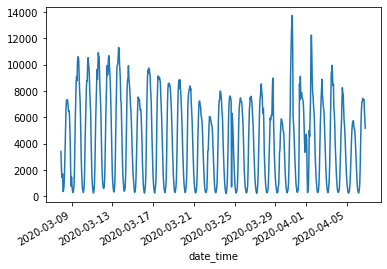

In [6]:
df_table['COUNT_DISTINCT_MSISDN__']['OKT'].plot()

In [7]:
df_table1 = pd.pivot_table(df, values=['COUNT_*_', 'COUNT_DISTINCT_MSISDN__'], columns = ['TOWN'], index=['SDATE'], 
                       aggfunc=np.sum, fill_value=0)
df_table1.head()

COUNT_*_                                                            \
TOWN            ACA     AED   AFS    AIR   ALB   AMH   ARD    BAB   BCB   BCC   
SDATE                                                                           
2020-03-07    17977   15478   261    474   406    88   296   1441    60   103   
2020-03-08   341972  285313  5247   9354  5262  1526  5801  25684   882  1253   
2020-03-09   506709  385020  6789  12617  7634  2663  7711  36832  1316  2019   
2020-03-10   483398  384440  6699  11980  7948  2389  7317  35411  1333  1983   
2020-03-11   496093  381197  6706  12527  7341  2375  7777  35994  1374  2045   

            ... COUNT_DISTINCT_MSISDN__                                  \
TOWN        ...                     OKT  OLD    OLO     OOT    OPB  OPK   
SDATE       ...                                                           
2020-03-07  ...                    3401   31   2578    4076    295    2   
2020-03-08  ...                   93022  562  64760  109985   7881  135   
2020-03-09  ...                  130864  985  85836  150935  11251  254   
2020-03-10  ...                  128442  874  84358  149980  11027  238   
2020-03-11  ...                  132559  942  86314  163344  11023  215   

                                             
TOWN          OSC      OTR    OWD Test_site  
SDATE                                        
2020-03-07   1891    67656   2273         0  
2020-03-08  54622  1879658  63208         0  
2020-03-09  72279  2593711  84204         0  
2020-03-10  70379  2502512  85068         0  
2020-03-11  72347  2555624  85456         1  

[5 rows x 76 columns]

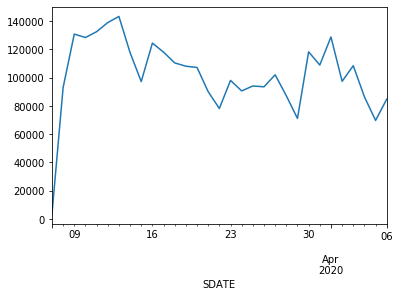

In [8]:
df_table1['COUNT_DISTINCT_MSISDN__']['OKT'].plot()

In [ ]:
#TENSOR Flow prediction